In [1]:
import import_ipynb
from feature import Feature
#import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
class Training:
    def __init_(self):
        self.data = None
        
    def data_training(self):
        ft = Feature()
        dataTr = ft.get_data(70)
        dataTs = ft.get_data(5)
        return [dataTr, dataTs]

In [3]:
training = Training()
dataTr, dataTs = training.data_training()

1
2
1
2


In [4]:
print(dataTr.head())

   Pokemon_ID    PC  Attack  Defense  Stamina  IVA  IVD  IVP       PCM  Level
0       289.0  3672     290      166      284   15   15   15  0.719399     29
1       289.0  1519     290      166      284   15   15   15  0.462798     12
2       289.0  3798     290      166      284   15   15   15  0.731700     30
3       289.0  2025     290      166      284   15   15   15  0.534354     16
4       289.0  3292     290      166      284   15   15   15  0.681165     26


In [5]:
dataTr = dataTr[dataTr["PC"] != 0]
dataTs = dataTs[dataTs["PC"] != 0]

In [21]:
XTr = dataTr[['Pokemon_ID', 'PC', 'Attack', 'Defense', 'Stamina']]
YTr = dataTr[['IVA', 'IVD', 'IVP', 'Level']]
XTs = dataTs[['Pokemon_ID', 'PC', 'Attack', 'Defense', 'Stamina']]
YTs = dataTs[['IVA', 'IVD', 'IVP', 'Level']]

In [22]:
XTr

,Pokemon_ID,PC,Attack,Defense,Stamina
0,289.0,3672,290,166,284
1,289.0,1519,290,166,284
2,289.0,3798,290,166,284
3,289.0,2025,290,166,284
4,289.0,3292,290,166,284
...,...,...,...,...,...
48785,129.0,61,29,85,85
48786,129.0,172,29,85,85
48787,129.0,12,29,85,85
48788,129.0,141,29,85,85


In [23]:
categorical_features = ['Pokemon_ID']
numerical_features = ['PC', 'Attack', 'Defense', 'Stamina']

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Escalar características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-Hot Encoding para categóricas
    ])

In [25]:
XTr_processed = preprocessor.fit_transform(XTr)
XTs_processed = preprocessor.transform(XTs)


In [26]:
print(f"\nTamaño del conjunto de entrenamiento X: {XTr.shape}")
print(f"Tamaño del conjunto de prueba X: {XTs.shape}")
print(f"Tamaño del conjunto de entrenamiento y: {YTr.shape}")
print(f"Tamaño del conjunto de prueba y: {YTs.shape}")

print("\nForma de X_train después del preprocesamiento:")
print(XTr_processed.shape) # Tendrá más columnas debido al OneHotEncoder
print("Forma de X_test después del preprocesamiento:")
print(XTs_processed.shape)


Tamaño del conjunto de entrenamiento X: (48790, 5)
Tamaño del conjunto de prueba X: (3485, 5)
Tamaño del conjunto de entrenamiento y: (48790, 4)
Tamaño del conjunto de prueba y: (3485, 4)

Forma de X_train después del preprocesamiento:
(48790, 701)
Forma de X_test después del preprocesamiento:
(3485, 701)


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Para predecir múltiples salidas, RandomForestRegressor puede manejarlo directamente.
# Si usas una red neuronal, la capa de salida tendrá 4 neuronas (IVA, IVD, IVP, PCM)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(XTr_processed, YTr)

RandomForestRegressor(random_state=42)

In [28]:
Y_pred = model.predict(XTs_processed)

In [29]:
print("\nPrimeras 5 predicciones (y_pred):")
print(Y_pred[:5])
print("\nPrimeros 5 valores reales (y_test):")
print(YTs.head())


Primeras 5 predicciones (y_pred):
[[15.   15.   15.   18.01]
 [15.   15.   15.   23.67]
 [15.   15.   15.    6.45]
 [15.   15.   15.   18.01]
 [15.   15.   15.    8.43]]

Primeros 5 valores reales (y_test):
   IVA  IVD  IVP  Level
0   15   15   15     18
1   15   15   15     23
2   15   15   15      6
3   15   15   15     18
4   15   15   15      7


In [30]:
YTs_numpy = YTs.to_numpy()

In [31]:
print(f"MAE Promedio Global: {mean_absolute_error(YTs, Y_pred):.2f}")
rmse = np.sqrt(mean_squared_error(YTs, Y_pred))
print(f"RMSE Global: {rmse:.2f}")
r2 = r2_score(YTs, Y_pred)
print(f"R-squared Global: {r2:.2f}")
print("-" * 20)

MAE Promedio Global: 0.02
RMSE Global: 0.09
R-squared Global: 1.00
--------------------


In [32]:
# Para IVA, IVD, IVP (rango 0-15)
Y_pred[:, 0:3] = np.clip(np.round(Y_pred[:, 0:3]), 0, 15)

# Para Level (rango 1-30)
#Y_pred[:, 3] = np.clip(np.round(Y_pred[:, 3]), 1, 30)
print(f"MAE Promedio Global: {mean_absolute_error(YTs, Y_pred):.2f}")
rmse = np.sqrt(mean_squared_error(YTs, Y_pred))
print(f"RMSE Global: {rmse:.2f}")
r2 = r2_score(YTs, Y_pred)
print(f"R-squared Global: {r2:.2f}")
print("-" * 20)

MAE Promedio Global: 0.02
RMSE Global: 0.09
R-squared Global: 1.00
--------------------


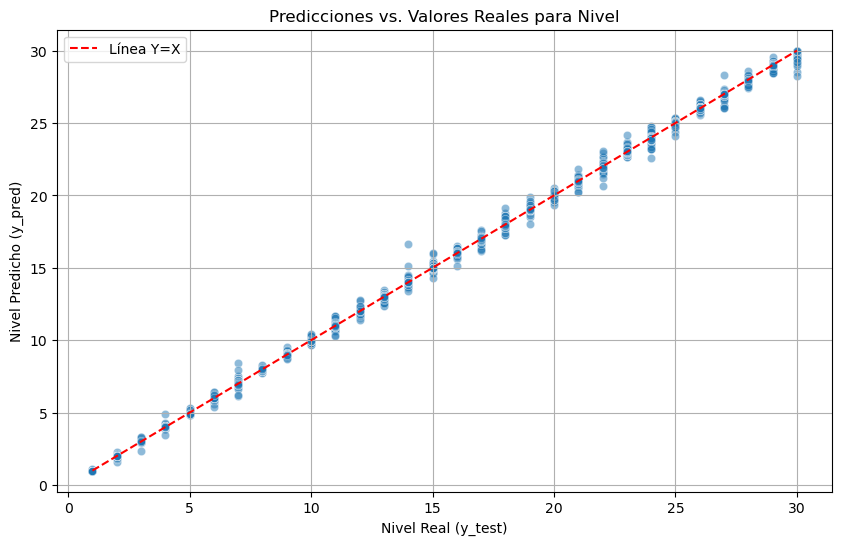

In [33]:
# Visualización para una de las variables, por ejemplo, Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=YTs_numpy[:, 3], y=Y_pred[:, 3], alpha=0.5) # Asumiendo Level es la 4ta columna (índice 3)
plt.title('Predicciones vs. Valores Reales para Nivel')
plt.xlabel('Nivel Real (y_test)')
plt.ylabel('Nivel Predicho (y_pred)')
plt.grid(True)
plt.plot([min(YTs_numpy[:, 3]), max(YTs_numpy[:, 3])], [min(YTs_numpy[:, 3]), max(YTs_numpy[:, 3])], color='red', linestyle='--', label='Línea Y=X') # Línea de referencia
plt.legend()
plt.show()

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Paso 1: Aplicar preprocesamiento
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)) # Paso 2: Entrenar el regresor
])
print("\nFitting the pipeline...")
model_pipeline.fit(X_train, y_train) # Pass original X_train, not X_train_processed

print("\nPipeline fitted successfully!")